# Seatle Airbnb House Price Analysis

This project focuses on the house price of Airbnb in Seatle. I downloaded the data from Kaggle(https://www.kaggle.com/airbnb/seattle). The airbnb also provides their data to the public including many cities(http://insideairbnb.com/get-the-data.html). The questions I try to answer here are 
1) What is the main factors that affect the house price?
2) The predition of the house price. 

First, let's read in the data and necessary library.

In [40]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython import display
%matplotlib inline

#solve the error of import basemap
import os
os.environ['PROJ_LIB'] = r'c:\Users\YiChen\Anaconda3\Library\share'


from mpl_toolkits.basemap import Basemap
# https://github.com/matplotlib/basemap/issues/419




# Load the Data

In this project, I focus on the listing price of the Airbnb house.

In [41]:
df_listing = pd.read_csv(r"C:\Users\YiChen\Downloads\new study\udacity\blog post and github\seattle\listings.csv")
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [42]:
df_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

# Preprocessing

## Price Map

There are three kinds of price, daily price, weekly price and monthly price.

In [43]:
price = df_listing[['price','weekly_price','monthly_price']]

In [44]:
price.isnull().mean()

price            0.000000
weekly_price     0.473808
monthly_price    0.602672
dtype: float64

I dropped the weekly_price and monthly_price, because of the data missing.
 

In [59]:
df_listing = df_listing.drop(['weekly_price','monthly_price'],axis = 1)

In [60]:
df_listing['price'] = pd.to_numeric(df_listing['price'].apply(lambda x: str(x).replace('$','').replace(',','')),errors = 'coerce')

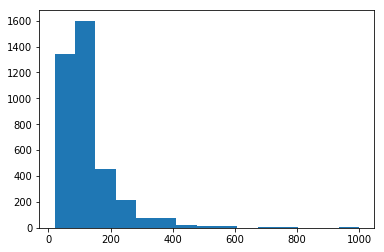

In [61]:
plt.hist(df_listing['price'],bins = 15)
plt.show()

We noticed that the price is mainly in the range \\$0 - $400.

In [48]:
#import the folium package
import folium
from folium import plugins

In [49]:
# let's begin to draw the price map on google map.
#get latitude and longitude minimum. 

lat_min = df_listing['latitude'].min()
lon_min = df_listing['longitude'].min()
 
 

In [131]:
df_listing['color']=df_listing['price'].apply(lambda price:"Black" if price>=600 else
                                         "darkblue" if price>=400 and price<600 else
                                         "red" if price>=200 and price<400 else
                                         "green" if price>=150 and price<200 else
                                         "Orange" if price>=100 and price<150 else
                                         "lightblue" if price>=75 and price<100 else
                                         "brown" if price>=50 and price<75 else
                                         "grey")
df_listing['size']=df_listing['price'].apply(lambda price:12 if price>=600 else
                                        10 if price>=400 and price<600 else
                                         8 if price>=200 and price<400 else
                                         6 if price>=150 and price<200 else
                                        4 if price>=100 and price<150 else
                                         2 if price>=75 and price<100 else
                                        1 if price>=50 and price<75 else
                                         0.5)
                                              

In [132]:
 
m=folium.Map([lon_min,lat_min],zoom_start=5)
#location=location[0:2000]
for lat,lon,price,color,size in zip(df_listing['latitude'],df_listing['longitude'],df_listing['price'],df_listing['color'],df_listing['size']):
     folium.CircleMarker([lat, lon], 
                         radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)


In [133]:
m

The map plotting shows most of the airbnb house is in the central area. And the house in the central area is more expensive

## Access Missing Data

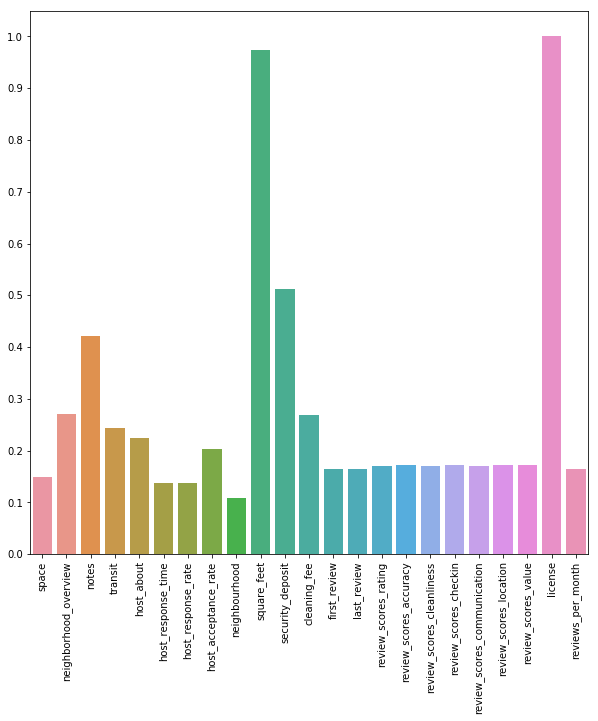

In [62]:
#draw the missing value counts(by mean)
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0,1.2,0.1))
sns.barplot(x = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].index, y = df_listing.isnull().mean()[df_listing.isnull().mean() >= 0.1 ].values)
plt.show()

In [63]:
# Remove the outlier columns from the dataset.
percent_missing_per_column =(df_listing.isnull().mean())*100
percent_missing_per_column_20 = percent_missing_per_column[percent_missing_per_column>20]
drop_columns = percent_missing_per_column_20.index.tolist()
print('These columns have more than 20 percent missing data, and will be dropped:{}'.format(drop_columns))

These columns have more than 20 percent missing data, and will be dropped:['neighborhood_overview', 'notes', 'transit', 'host_about', 'host_acceptance_rate', 'square_feet', 'security_deposit', 'cleaning_fee', 'license']


In [64]:
df_listing = df_listing.drop(drop_columns, axis=1)
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,thumbnail_url,...,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,color,size
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,WASHINGTON,f,moderate,f,f,2,4.07,lightblue,2.0
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,https://a0.muscache.com/ac/pictures/14409893/f...,...,f,WASHINGTON,f,strict,t,t,6,1.48,green,6.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,NaN,...,f,WASHINGTON,f,strict,f,f,2,1.15,Black,12.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,WASHINGTON,f,flexible,f,f,1,NaN,Orange,4.0
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,NaN,...,f,WASHINGTON,f,strict,f,f,1,0.89,darkblue,10.0


## Select related features

In this analysis, I focus on four factors that can affect the rent price:1)whether the host is superhost;2)location, the variables including 'neighborhood' and 'zipcode';3)Property type, including 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'bed_type', 'guests_included', 'extra_people', 'cancellation_policy'. 4)review, including 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',  'review_scores_location',  'review_scores_value'. I will check the correlation between the above variables, and choose the low-correlated features. 

In [70]:
df_list_new = df_listing[[ 'price', 'host_is_superhost', 'neighbourhood', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type',  'guests_included', 'extra_people', 'cancellation_policy','number_of_reviews',
      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]]

In [71]:
df_list_new.corr()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
price,1.000000,0.652218,0.516424,0.627720,0.589525,0.392875,-0.124695,0.055551,0.019026,0.054357,0.007877,0.012990,0.075069,-0.041776
accommodates,0.652218,1.000000,0.538439,0.770974,0.861119,0.532796,-0.072978,-0.013101,-0.049665,0.011646,-0.019664,-0.013208,-0.037520,-0.062041
bathrooms,0.516424,0.538439,1.000000,0.610937,0.532838,0.304780,-0.092147,0.045101,-0.006129,0.018063,-0.002939,-0.016067,-0.008959,0.014297
bedrooms,0.627720,0.770974,0.610937,1.000000,0.753167,0.457009,-0.105555,0.023257,-0.011943,-0.008089,0.010509,0.001113,-0.028991,-0.001208
beds,0.589525,0.861119,0.532838,0.753167,1.000000,0.460512,-0.089077,-0.000720,-0.052767,0.004732,-0.021963,-0.013373,-0.023734,-0.029102
guests_included,0.392875,0.532796,0.304780,0.457009,0.460512,1.000000,0.028114,-0.001430,0.003410,0.017999,0.035315,0.011658,-0.026576,-0.021561
number_of_reviews,-0.124695,-0.072978,-0.092147,-0.105555,-0.089077,0.028114,1.000000,0.036242,0.066618,0.055609,0.089449,0.072957,-0.009188,0.044110
review_scores_rating,0.055551,-0.013101,0.045101,0.023257,-0.000720,-0.001430,0.036242,1.000000,0.621257,0.642882,0.521813,0.540620,0.368423,0.696534
review_scores_accuracy,0.019026,-0.049665,-0.006129,-0.011943,-0.052767,0.003410,0.066618,0.621257,1.000000,0.543345,0.407238,0.423189,0.267605,0.562878
review_scores_cleanliness,0.054357,0.011646,0.018063,-0.008089,0.004732,0.017999,0.055609,0.642882,0.543345,1.000000,0.398696,0.388146,0.277834,0.524354


Based on the correlation matrix, and the previous graph. I would choose 'host_is_superhost','neighbourhood','property_type','room_type', 'accommodates','review_scores_rating' as the variables.

### check on the abnormal data.

In [63]:
df_listing[df_listing['price']>800][[ 'price', 'host_is_superhost', 'neighbourhood', 'zipcode', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'cleaning_fee', 'guests_included', 'extra_people', 'cancellation_policy','number_of_reviews',
      'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value' ]]


,price,host_is_superhost,neighbourhood,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,extra_people,cancellation_policy,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
2,975.0,f,Queen Anne,98119,House,Entire home/apt,11,4.5,5.0,7.0,...,$25.00,strict,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
1208,999.0,f,Belltown,98101,Apartment,Entire home/apt,4,1.0,1.0,1.0,...,$10.00,moderate,54,94.0,9.0,9.0,10.0,10.0,10.0,9.0
1279,899.0,f,Belltown,98121,Apartment,Entire home/apt,10,2.0,3.0,4.0,...,$0.00,strict,5,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3122,1000.0,f,Ravenna,98115,House,Entire home/apt,4,1.0,2.0,2.0,...,$0.00,flexible,1,100.0,10.0,10.0,10.0,10.0,8.0,10.0
3443,950.0,f,Magnolia,98199,House,Entire home/apt,6,3.5,3.0,3.0,...,$100.00,strict,5,96.0,10.0,10.0,10.0,10.0,10.0,10.0


The expensive house still have reviews and other specific information. So I would like to keep those data. 

### Select features

In [72]:
df_list_new = df_listing[[ 'price', 'host_is_superhost','zipcode', 'property_type', 'room_type', 'bed_type','accommodates',
      'cancellation_policy','number_of_reviews','review_scores_rating' ]]

In [73]:
#check the missing value 
df_list_new.isnull().mean()

price                   0.000000
host_is_superhost       0.000524
zipcode                 0.001833
property_type           0.000262
room_type               0.000000
bed_type                0.000000
accommodates            0.000000
cancellation_policy     0.000000
number_of_reviews       0.000000
review_scores_rating    0.169460
dtype: float64

In [74]:
#drop the row missing value 
df_list_new = df_list_new.dropna()

In [78]:
df_list_new = df_list_new.reset_index(drop=True)

In [79]:
df_list_new.head()

,price,host_is_superhost,zipcode,property_type,room_type,bed_type,accommodates,cancellation_policy,number_of_reviews,review_scores_rating
0,85.0,f,98119,Apartment,Entire home/apt,Real Bed,4,moderate,207,95.0
1,150.0,t,98119,Apartment,Entire home/apt,Real Bed,4,strict,43,96.0
2,975.0,f,98119,House,Entire home/apt,Real Bed,11,strict,20,97.0
3,450.0,f,98119,House,Entire home/apt,Real Bed,6,strict,38,92.0
4,120.0,f,98119,House,Private room,Real Bed,2,strict,17,95.0


### Encode the Categorical varibles. 

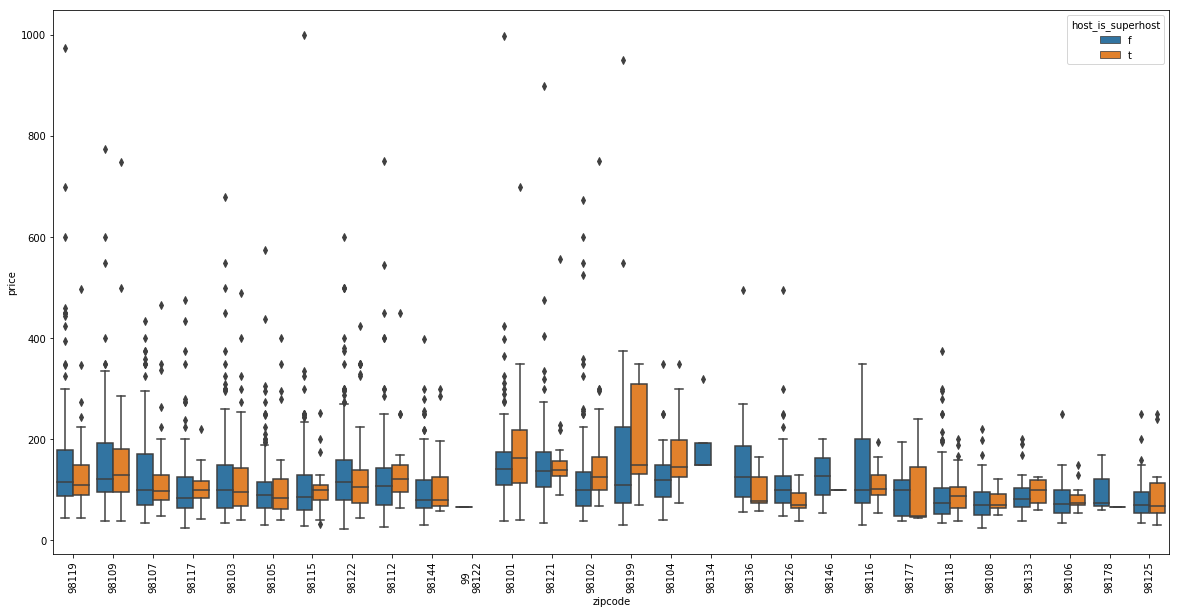

In [80]:
#check on the zipcode first.
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.boxplot(x = 'zipcode',y = 'price' , hue ='host_is_superhost',data = df_list_new)

In [94]:
#There are 27 zipcodes, some of them have overlapping on price, I am going to re-encode it, that reduce the zipcode dimension.
price_zipcode = df_list_new.groupby('zipcode')['price'].describe()

In [97]:
price_zipcode.reset_index(inplace = True)

In [99]:
price_zipcode.sort_values(by = ['25%'])

,zipcode,count,mean,std,min,25%,50%,75%,max
24,98177,15.0,95.866667,59.524145,39.0,47.00,99.0,119.50,240.0
5,98106,51.0,83.882353,37.885959,35.0,55.00,75.0,99.00,250.0
7,98108,48.0,80.770833,41.896143,25.0,55.00,70.0,99.00,220.0
17,98125,59.0,87.203390,50.183724,30.0,55.00,70.0,103.00,250.0
13,98118,134.0,93.067164,59.384335,34.0,57.25,75.0,105.00,375.0
10,98115,147.0,109.897959,96.230512,28.0,60.00,88.0,125.00,1000.0
22,98144,167.0,101.461078,58.711029,30.0,65.00,80.0,121.00,399.0
4,98105,177.0,107.740113,75.508957,30.0,65.00,89.0,115.00,575.0
25,98178,4.0,92.750000,51.201400,60.0,65.25,71.0,98.50,169.0
19,98133,35.0,91.685714,38.866870,39.0,66.00,86.0,110.00,200.0


In [124]:
# the zipcode can be classified by "25%"
a = price_zipcode['25%'] <= 70
b =  price_zipcode['75%']<= 100
c =  price_zipcode['75%'] > 100
zipcode1 = price_zipcode[a & b ]['zipcode'].values.tolist()
zipcode2 = price_zipcode[a & c ]['zipcode'].values.tolist()
print(zipcode1,zipcode2)

['98106', '98108', '98178', '99\n98122'] ['98103', '98105', '98115', '98117', '98118', '98125', '98126', '98133', '98144', '98177']


In [125]:

a = price_zipcode['25%']<=100
b = price_zipcode['25%'] >70
c = price_zipcode['75%'] <161
d =price_zipcode['75%'] >=161
e = price_zipcode['75%'] <191
f = price_zipcode['75%'] >192
zipcode3 = price_zipcode[a &b& c ]['zipcode'].values.tolist()
zipcode4 = price_zipcode[a &b& d&e ]['zipcode'].values.tolist()
zipcode5 = price_zipcode[a &b& f ]['zipcode'].values.tolist()
print(zipcode3,zipcode4,zipcode5) 

['98102', '98104', '98107', '98112', '98122', '98136', '98146'] ['98109', '98116', '98119'] ['98199']


In [126]:
a = price_zipcode['25%']<=120
b = price_zipcode['25%'] >100
zipcode6 = price_zipcode[ a & b ]['zipcode'].values.tolist()
print(zipcode6)

['98101', '98121']


In [127]:
zipcode7 = price_zipcode[price_zipcode['25%'] > 120]['zipcode'].values.tolist()
print(zipcode7)

['98134']


In [134]:
df_list_new['zipcode_group']=df_list_new['zipcode'].apply(lambda zipcode:'group1' if zipcode in zipcode1 else
                                        'group2' if zipcode in zipcode2 else
                                         'group3' if zipcode in zipcode3 else
                                         'group4' if zipcode in zipcode4 else
                                         'group5' if zipcode in zipcode5 else
                                          'group6' if zipcode in zipcode6 else
                                        'group7')

In [136]:
df_list_new['zipcode_group'].value_counts()

group2    1249
group3    1044
group4     369
group6     344
group1     104
group5      51
group7       4
Name: zipcode_group, dtype: int64

In [137]:
df_list_new.dtypes

price                   float64
host_is_superhost        object
zipcode                  object
property_type            object
room_type                object
bed_type                 object
accommodates              int64
cancellation_policy      object
number_of_reviews         int64
review_scores_rating    float64
zipcode_group            object
dtype: object

In [138]:
df_list_new = df_list_new.drop(['zipcode'],axis =1 )

### Encode the other categorical variables

In [139]:
df_list_new.dtypes

price                   float64
host_is_superhost        object
property_type            object
room_type                object
bed_type                 object
accommodates              int64
cancellation_policy      object
number_of_reviews         int64
review_scores_rating    float64
zipcode_group            object
dtype: object

In [140]:
df_list_nums = df_list_new.select_dtypes(include = ['float','int64']) 
df_list_cat = df_list_new.select_dtypes(include = ['object']) 

In [141]:
df_list_nums.columns

Index(['price', 'accommodates', 'number_of_reviews', 'review_scores_rating'], dtype='object')

In [143]:
df_list_cat.columns

Index(['host_is_superhost', 'property_type', 'room_type', 'bed_type',
       'cancellation_policy', 'zipcode_group'],
      dtype='object')

In [144]:
cat = df_list_cat.columns

In [145]:
df_list_cat_new = pd.get_dummies(df_list_cat, prefix = cat, drop_first = True, dummy_na = False)

In [146]:
df_list = pd.concat([df_list_nums,df_list_cat_new],axis = 1)

In [147]:
df_list.head()

,price,accommodates,number_of_reviews,review_scores_rating,host_is_superhost_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,zipcode_group_group2,zipcode_group_group3,zipcode_group_group4,zipcode_group_group5,zipcode_group_group6,zipcode_group_group7
0,85.0,4,207,95.0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
1,150.0,4,43,96.0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2,975.0,11,20,97.0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,450.0,6,38,92.0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,120.0,2,17,95.0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [148]:
df_list.dtypes

price                            float64
accommodates                       int64
number_of_reviews                  int64
review_scores_rating             float64
host_is_superhost_t                uint8
property_type_Bed & Breakfast      uint8
property_type_Boat                 uint8
property_type_Bungalow             uint8
property_type_Cabin                uint8
property_type_Camper/RV            uint8
property_type_Chalet               uint8
property_type_Condominium          uint8
property_type_Dorm                 uint8
property_type_House                uint8
property_type_Loft                 uint8
property_type_Other                uint8
property_type_Tent                 uint8
property_type_Townhouse            uint8
property_type_Treehouse            uint8
property_type_Yurt                 uint8
room_type_Private room             uint8
room_type_Shared room              uint8
bed_type_Couch                     uint8
bed_type_Futon                     uint8
bed_type_Pull-ou

In [149]:
df_list.describe()

,price,accommodates,number_of_reviews,review_scores_rating,host_is_superhost_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,zipcode_group_group2,zipcode_group_group3,zipcode_group_group4,zipcode_group_group5,zipcode_group_group6,zipcode_group_group7
count,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.00000,...,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000,3165.000000
mean,126.717852,3.381991,26.735229,94.540916,0.236967,0.007899,0.001264,0.002844,0.006635,0.00316,...,0.012322,0.959558,0.358294,0.395893,0.394629,0.329858,0.116588,0.016114,0.108689,0.001264
std,89.933560,1.985661,39.911098,6.609669,0.425289,0.088538,0.035533,0.053258,0.081198,0.05613,...,0.110337,0.197025,0.479575,0.489119,0.488848,0.470236,0.320979,0.125933,0.311298,0.035533
min,22.000000,1.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,2.000000,4.000000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,3.000000,13.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,150.000000,4.000000,32.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,16.000000,474.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Rescale the data

In [150]:
#Rescale the review_scores_rating
df_list['review_scores_rating'] = (df_list['review_scores_rating'] -df_list['review_scores_rating'].mean())/(df_list['review_scores_rating'].max() - df_list['review_scores_rating'].min() )

## regression model

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [152]:
X = df_list.drop(['price'],axis = 1)
y = df_list['price']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [154]:
#linearregression
 
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
y_train_pred = ln.predict(X_train)
y_test_pred = ln.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 4221.142, test: 3569.585
R^2 train: 0.497, test: 0.515


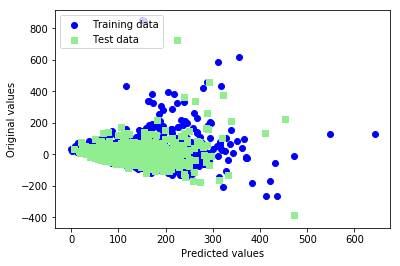

In [156]:
plt.scatter(y_train_pred, y_train - y_train_pred,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test-y_test_pred,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values')
plt.legend(loc='upper left')
plt.show()

In [157]:
#randomforest
rf = RandomForestRegressor(n_estimators = 140,
               min_samples_split=10,
 min_samples_leaf=4,
 max_features=None,
 max_depth= 46,
 bootstrap=True)
rf.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=46,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=140, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [158]:
 
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 2739.141, test: 3567.828
R^2 train: 0.674, test: 0.516


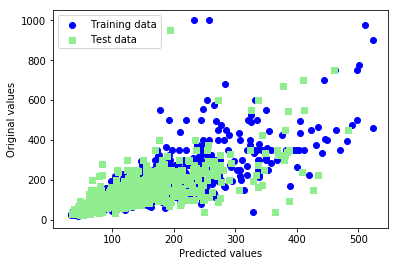

In [159]:
plt.scatter(y_train_pred, y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Original values')
plt.legend(loc='upper left')
plt.show()

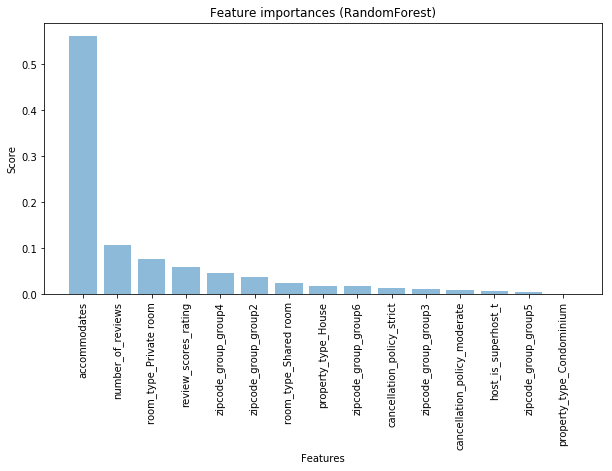

In [160]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x: x[1] * -1)
rf_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances for top 15 features
features = rf_feature_importances['name'][:15]
y_pos = np.arange(len(features))
scores = rf_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances (RandomForest)')

 
 
plt.show()

In [161]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None],
 'max_features': ['auto', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [162]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', None], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [163]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 15,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 38,
 'bootstrap': True}

In [164]:
def evaluate(model, X,y):
    predictions = model.predict(X)
    errors = abs(predictions - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    r2 = r2_score(y,predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('R-square = {:0.2f}%.'.format(r2))
    return accuracy, r2

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
(base_accuracy,base_r2) = evaluate(base_model,X_test,y_test)
y_test_pred = base_model.predict(X_test)
 
 
best_random = rf_random.best_estimator_
(random_accuracy,random_r2) = evaluate(best_random,X_test,y_test)
y_test_pred = best_random.predict(X_test)
 
 
print('Improvement of accuracy: {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
print('Improvement of R-square {:0.2f}%.'.format( 100 * (random_r2 - base_r2) / base_r2))
 

Model Performance
Average Error: 38.3503 degrees.
Accuracy = 67.86%.
R-square = 0.39%.
Model Performance
Average Error: 35.1140 degrees.
Accuracy = 69.90%.
R-square = 0.52%.
Improvement of accuracy: 3.01%.
Improvement of R-square 32.65%.


The randomsearch crossvalidation shows better result than the base model.  